In [2]:
from time import time
import numpy as np
# Standard library
import pickle
import gzip
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.decomposition import RandomizedPCA
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def recognizePCA(train, trainlab, test, labels, num=None):

    #train4pca = train4pca[np.random.choice(train4pca.shape[0],8000)]
    # worked upto a level of 9000
    #print ('reducedtrain4pca ',np.shape(train4pca))
    #test4pca = test4pca[np.random.choice(test4pca.shape[0],8000)]
    # resorted to iterative method

    print (' Running Linear PCA .... ')
    num_test = len(test)
    num_train = len(train)
    #num_train = 10000
    n_components = 2
    n_batchsize = 1000
    dr_train = np.empty(shape=[0,2])
    dr_test = np.empty(shape=[0,2])
    train = np.array(train)/255
    test = np.array(test)/255

    t0 = time()
    for k in range(0, num_train, n_batchsize):
        minibatch = np.array(train)[k:k+n_batchsize]
        #print ('Model fitting ',k)
        PCADRobject = RandomizedPCA(n_components=n_components).fit(minibatch)
    print (' Model fitting ',PCADRobject)
    print ("Model fitting completed (time %.2fs)" % (time() - t0))

    t0 = time()   
    for k in range(0, num_train, n_batchsize):
        minibatch = np.array(train)[k:k+n_batchsize]
        x_train = PCADRobject.transform(minibatch)
        #print (' reduced training ',np.shape(x_train))
        dr_train = np.vstack([dr_train,x_train])
        #print ('stacked reduced training ',np.shape(dr_train))
    print ("Tranformation for Training completed (time %.2fs)" % (time() - t0))
    
    t0 = time()
    for k in range(0, num_test, n_batchsize):
        minibatch = np.array(test)[k:k+n_batchsize]
        #print ('minibatch ',np.shape(minibatch))
        #mdsobject = mdsobject(n_components=n_components).fit(minibatch)
        # returns class 'sklearn.decomposition.kernel_pca.mdsobject'
        #A = numpy.vstack([A, newrow])
        x_test = PCADRobject.transform(minibatch)
        #print (' reduced testing ',np.shape(x_test))
        dr_test = np.vstack([dr_test,x_test])
        #print ('stacked reduced testing ',np.shape(dr_test))
    print ("Tranformation for Testing completed (time %.2fs)" % (time() - t0))

    t0 = time()
    clf = KNeighborsClassifier()
    #fitting knn
    #print ('xtrain ',np.shape(xtrain))
    #print ('xtest ',np.shape(xtest))
    #print ('trainlab ',np.shape(trainlab))
    #print ('labels ',np.shape(labels))
    
    clf = clf.fit(dr_train, trainlab[:num_train])
    print ("KNN Classification fit completed (time %.2fs)" % (time() - t0))

    t0 = time()
    #predicting
    y_pred = clf.predict(dr_test[:num_test])
    #print ('y_pred ',np.shape(y_pred))
    print ("KNN Classification prediction completed (time %.2fs)" % (time() - t0))

    t0 = time()
    #checking the result and printing output
    r=0
    w=0
    for i in range(num_test):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(y_pred[i],labels[i]):
            r+=1
        else:
            w+=1
    print ("tested ", num_test, " digits")
    print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
    print ("got correctly ", float(r)*100/(r+w), "%")
    print ("KNN Classification model validation completed (time %.2fs)" % (time() - t0))

In [4]:
def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('./data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f,encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

In [5]:
def load_data_dr():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of DR.
    """
    tr_d, va_d, te_d = load_data()
    #training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_inputs = [np.reshape(x, 784) for x in tr_d[0]]
    training_results = [y for y in tr_d[1]] 
    training_data = zip(training_inputs, training_results)

    #validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_inputs = [np.reshape(x, 784) for x in va_d[0]]
    validation_results = [y for y in va_d[1]]
    validation_data = zip(validation_inputs, va_d[1])

    #test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]   
    test_inputs = [np.reshape(x, 784) for x in te_d[0]]   
    test_results = [y for y in te_d[1]]
    test_data = zip(test_inputs, te_d[1])

    return (training_inputs,training_results, validation_inputs,validation_results, test_inputs, test_results)

In [6]:
def visualizePCA(train, trainlab, test, labels, num=None):
    import matplotlib.pyplot as plt
    %matplotlib inline
    print (' Running Linear PCA .... ')
    num_test = len(test)
    num_train = len(train)
    #num_train = 10000
    n_components = 2
    n_batchsize = 1000
    dr_train = np.empty(shape=[0,2])
    dr_test = np.empty(shape=[0,2])

    train = np.array(train)/255
    test = np.array(test)/255
    t0 = time()
    for k in range(0, num_train, n_batchsize):
        minibatch = np.array(train)[k:k+n_batchsize]
        #print ('Model fitting ',k)
        PCADRobject = RandomizedPCA(n_components=n_components).fit(minibatch)
    print (' Model fitting ',PCADRobject)
    print ("Model fitting completed (time %.2fs)" % (time() - t0))

    t0 = time()   
    for k in range(0, num_train, n_batchsize):
        minibatch = np.array(train)[k:k+n_batchsize]
        x_train = PCADRobject.transform(minibatch)
        #print (' reduced training ',np.shape(x_train))
        dr_train = np.vstack([dr_train,x_train])
        #print ('stacked reduced training ',np.shape(dr_train))
    print ("Tranformation for Training completed (time %.2fs)" % (time() - t0))
    
    t0 = time()
    for k in range(0, num_test, n_batchsize):
        minibatch = np.array(test)[k:k+n_batchsize]
        #print ('minibatch ',np.shape(minibatch))
        #mdsobject = mdsobject(n_components=n_components).fit(minibatch)
        # returns class 'sklearn.decomposition.kernel_pca.mdsobject'
        #A = numpy.vstack([A, newrow])
        x_test = PCADRobject.transform(minibatch)
        #print (' reduced testing ',np.shape(x_test))
        dr_test = np.vstack([dr_test,x_test])
        #print ('stacked reduced testing ',np.shape(dr_test))
    print ("Tranformation for Testing completed (time %.2fs)" % (time() - t0))

    ### visualizing all the 10000 samples may prove unintuitive 
    ### hence select a sample of 1000 images
    xtest_sample = dr_test[:1000,:]
    test_results_sample = labels[0:1000]

    fig=plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    fig.suptitle('MNIST Images - Data Representation in 2D using PCA Reduction',fontsize=34, fontweight='bold')

    plt.xlabel('Principal Component#1', fontsize=25)
    plt.ylabel('Principal Component#2', fontsize=25)

    plt.scatter(dr_test[:,0],dr_test[:,1],c=labels,s=25)
    for label, x, y in zip(labels, dr_test[:,0], dr_test[:,1]):
        ax.annotate(label,xy=(x,y),textcoords='data', size=16)
    ax.legend()
    plt.grid()
    plt.show()

    import seaborn as sns
    sns.set(style="whitegrid", palette="muted")
    # Draw a categorical scatterplot to show each observation
    
    #sns.jointplot(x=xtest_sample[:,0], y=xtest_sample[:,1])
    
    
    df = pd.DataFrame({'PC#1':xtest_sample[:,0],'PC#2':xtest_sample[:,1],'ActualLabel':test_results_sample})
    sns.swarmplot(x='PC#1', y='PC#2',hue='ActualLabel',data=df)
    return df

In [7]:
training_inputs,training_results, validation_inputs,validation_results, test_inputs,test_results = load_data_dr()
recognizePCA(training_inputs, training_results, test_inputs, test_results)

 Running Linear PCA .... 
 Model fitting  RandomizedPCA(copy=True, iterated_power=3, n_components=2, random_state=None,
       whiten=False)
Model fitting completed (time 2.98s)
Tranformation for Training completed (time 1.89s)
Tranformation for Testing completed (time 0.07s)
KNN Classification fit completed (time 0.03s)
KNN Classification prediction completed (time 0.03s)
tested  10000  digits
correct:  3325 wrong:  6675 error rate:  66.75 %
got correctly  33.25 %
KNN Classification model validation completed (time 0.09s)


In [8]:
#df=visualizePCA(training_inputs, training_results, test_inputs, test_results)

In [9]:
training_inputs, training_results, test_inputs, test_results
import matplotlib.pyplot as plt

%matplotlib inline

train = np.array(training_inputs)/255
test = np.array(test_inputs)/255

PCADRobject = RandomizedPCA(n_components=2).fit(train)
dr_train = PCADRobject.transform(train)
dr_test = PCADRobject.transform(test)





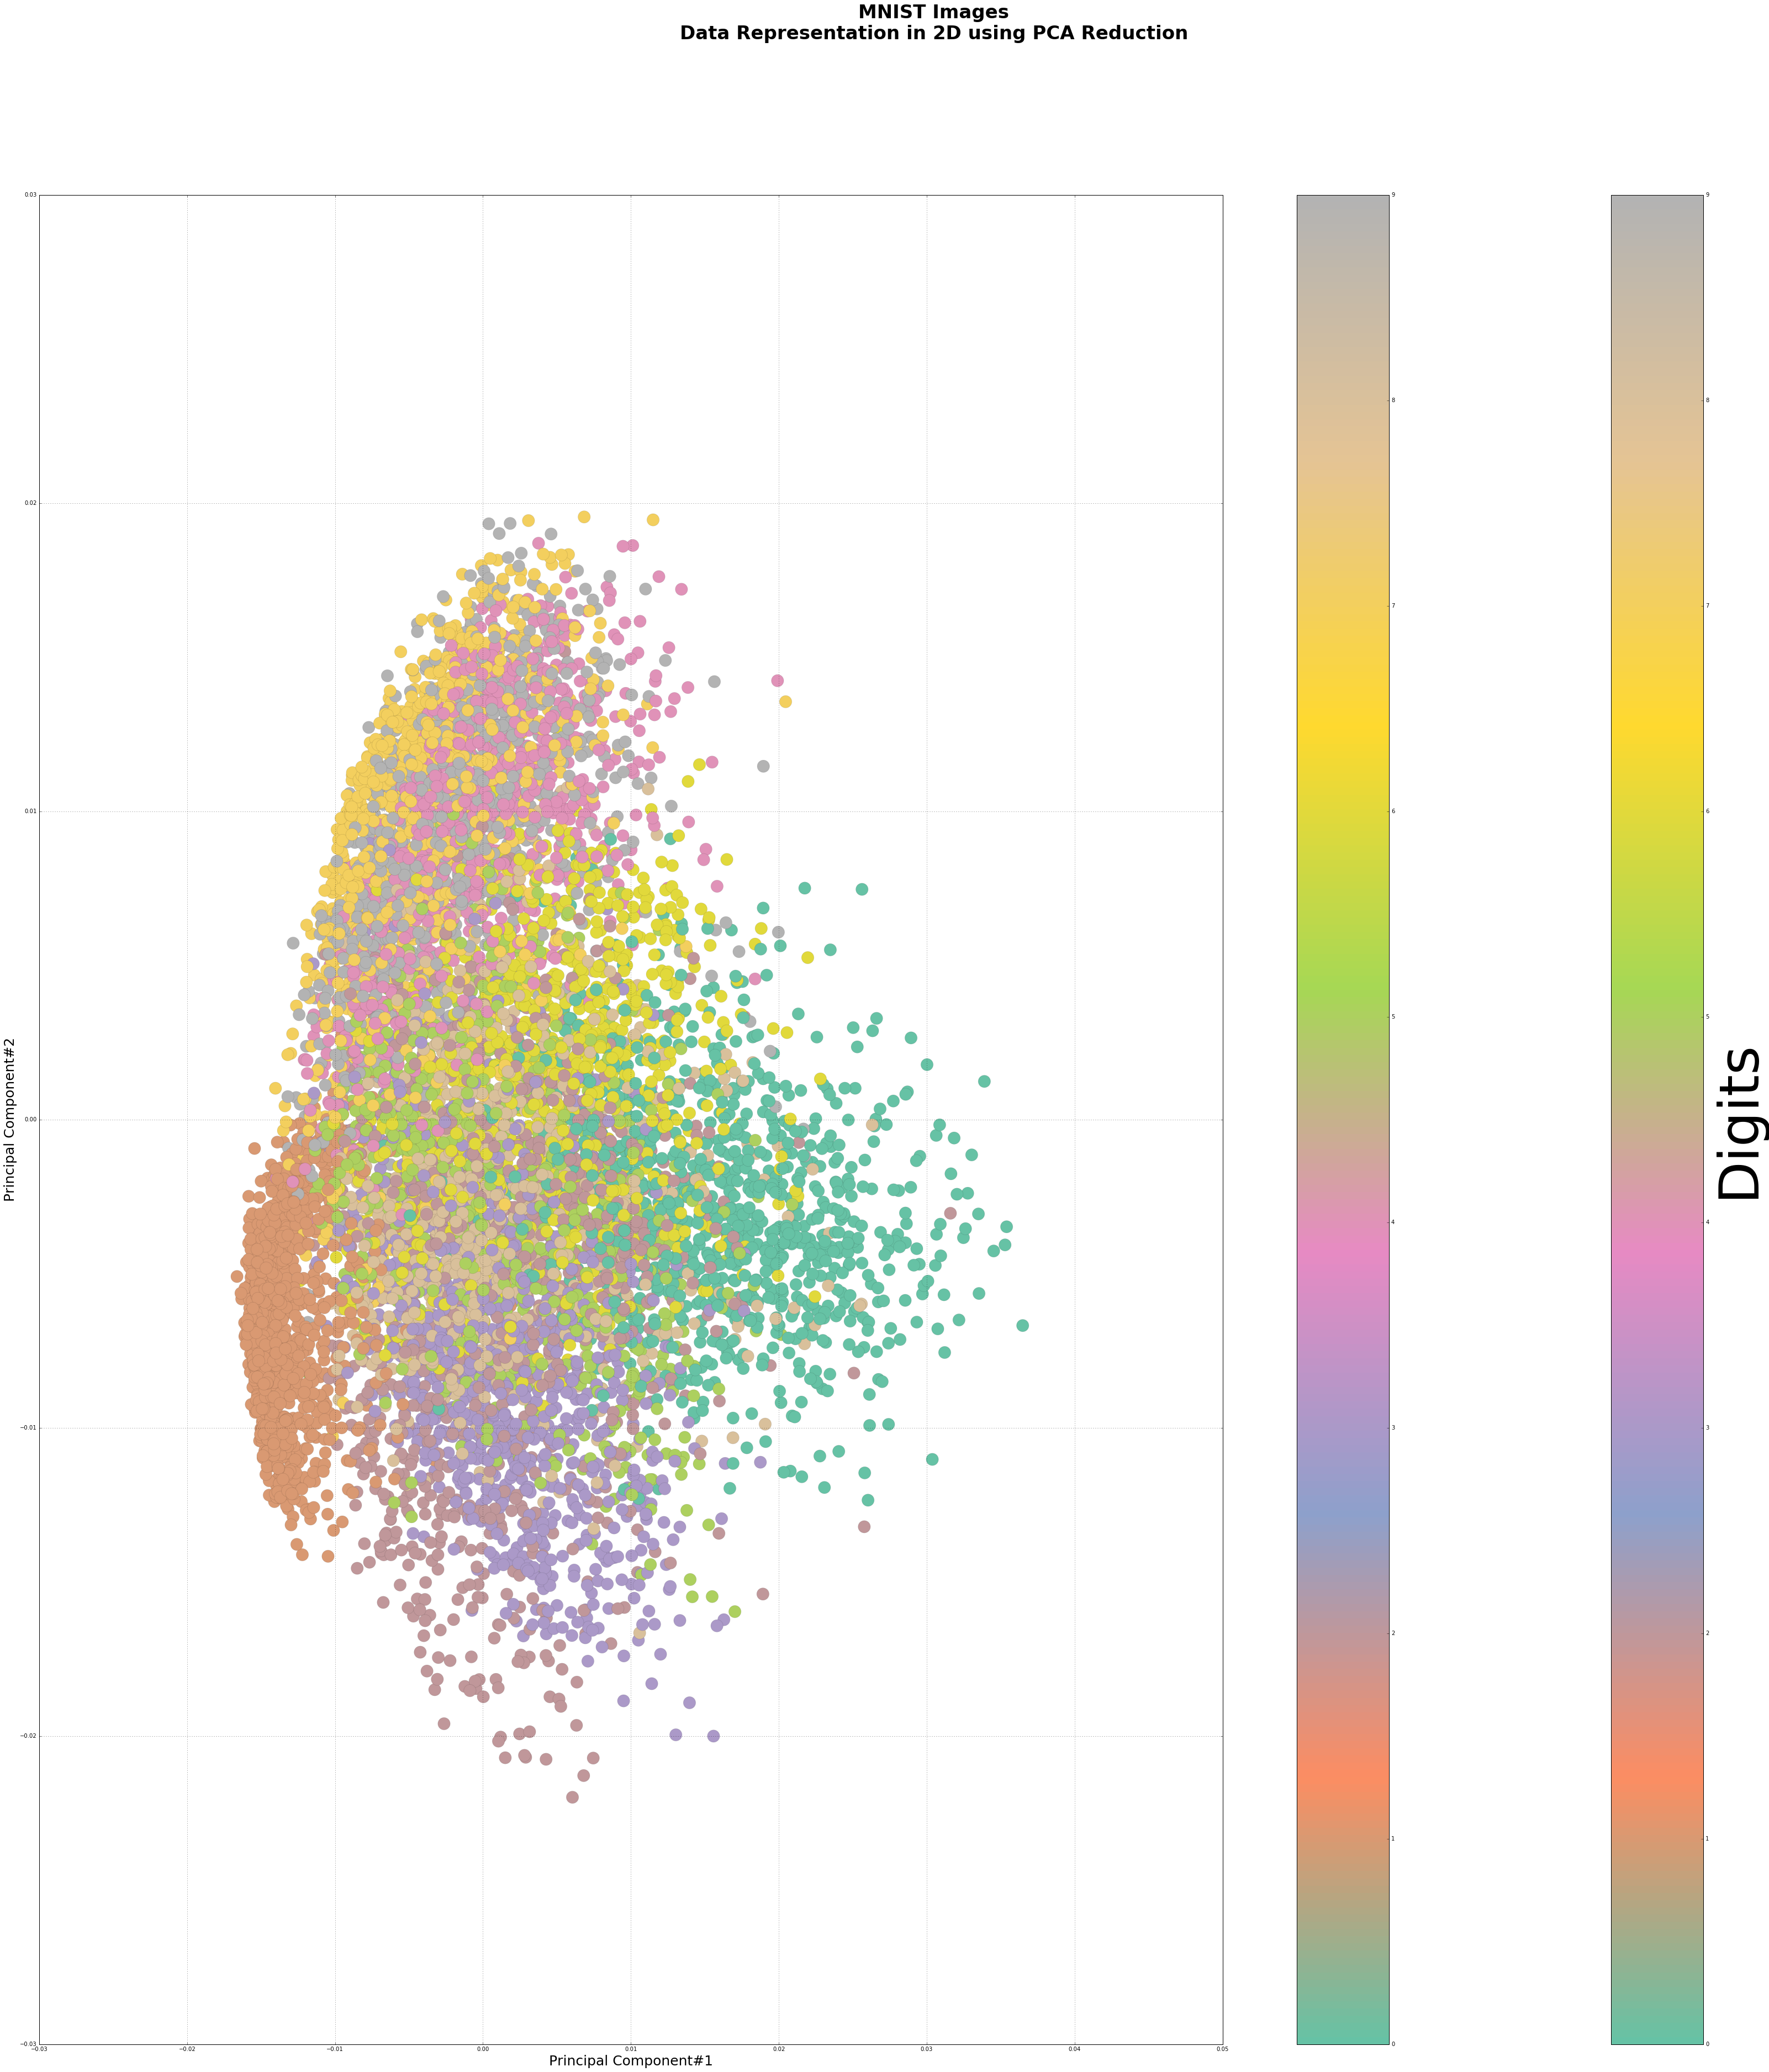

In [44]:
fig=plt.figure(figsize=(60,60))
cm = plt.cm.get_cmap('Set2')
#'Accent', 'Dark2', 'Paired', 'Pastel1','Pastel2', 'Set1', 'Set2', 'Set3'
#cm = plt.cm.Set3(np.linspace(0, 1, 10))
ax = fig.add_subplot(111)
fig.suptitle('MNIST Images\nData Representation in 2D using PCA Reduction',fontsize=34, fontweight='bold')

plt.xlabel('Principal Component#1', fontsize=25)
plt.ylabel('Principal Component#2', fontsize=25)

sc=plt.scatter(dr_test[:,0],dr_test[:,1],c=test_results,s=500,vmin=0, vmax=9,cmap=cm,alpha=1.1)

cbar = fig.colorbar(sc)
cbar.set_label('Digits',size=50)

#for label, x, y in zip(test_results, dr_test[:,0], dr_test[:,1]):
#    ax.annotate(label,xy=(x,y),textcoords='data', size=25)
#ax.legend()
plt.colorbar(sc)
plt.grid()
plt.show()



In [47]:
df = pd.DataFrame({'PC#1':dr_test[:,0],'PC#2':dr_test[:,1],'ActualLabel':test_results})

In [60]:
from bokeh.charts import Scatter, output_file, show
scatter = Scatter(df, x='PC#1', y='PC#2',
                  color='ActualLabel', marker='ActualLabel',
                  title='PCA 2d MNIST',
                  legend=True)

output_file("BOKEHofPCA2dMNIST.html", title="PCA 2d MNIST")

show(scatter)

In [56]:
#df.to_csv('pcadrout', sep='\t')
df

,ActualLabel,PC#1,PC#2
0,7,-0.004912,0.011383
1,2,0.000041,-0.014730
2,1,-0.014656,-0.006321
3,0,0.018944,0.001323
4,4,0.002985,0.010949
5,1,-0.015760,-0.007129
6,4,-0.003813,0.008503
7,9,-0.004821,0.005440
8,5,0.004014,0.002022
9,9,-0.000137,0.012935
